In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Загрузка данных
data = pd.read_csv("/content/yelp_labelled.txt", delimiter='\t', header=None, names=['text', 'value'])
data.head()

,text,value
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [101]:
yelp_df.shape

(1000, 2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['value'], test_size=0.25, random_state=1)

In [105]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (750,)
X_test: (250,)
y_train: (750,)
y_test: (250,)


In [106]:
X_train

298          Never again will I be dining at this place!
160    I came back today since they relocated and sti...
268    Just as good as when I had it more than a year...
658                    It was just not a fun experience.
996                             Appetite instantly gone.
                             ...                        
767                               The block was amazing.
72                                  The service was meh.
908                               We won't be returning.
235    If it were possible to give them zero stars, t...
37     Poor service, the waiter made me feel like I w...
Name: text, Length: 750, dtype: object

In [107]:
X_test

507                  My gyro was basically lettuce only.
818    It kept getting worse and worse so now I'm off...
452    I am far from a sushi connoisseur but I can de...
368          The staff are great, the ambiance is great.
242    By this time our side of the restaurant was al...
                             ...                        
385    I don't recommend unless your car breaks down ...
890    My boyfriend tried the Mediterranean Chicken S...
439                If you're not familiar, check it out.
135    Great Subway, in fact it's so good when you co...
567                                  Food was delicious!
Name: text, Length: 250, dtype: object

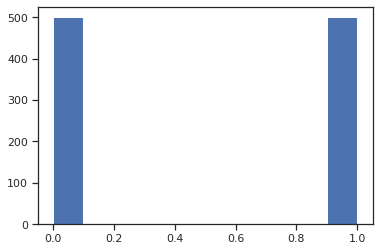

In [108]:
# В целевом признаке распределение классов равномерное
plt.hist(data['value'])
plt.show()

In [0]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)                        
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [110]:
X_train

<750x1711 sparse matrix of type '<class 'numpy.float64'>'
	with 7315 stored elements in Compressed Sparse Row format>

In [111]:
X_test

<250x1711 sparse matrix of type '<class 'numpy.float64'>'
	with 2120 stored elements in Compressed Sparse Row format>

In [0]:
def test_model(classifiers_list):
    for c in classifiers_list:
        c.fit(X_train, y_train)
        y_pred = c.predict(X_test)
        print('Модель для классификации - {}'.format(c)) 
        print('====================================')
        print('accuracy_score:  ', accuracy_score(y_test, y_pred))
        print('precision_score: ', precision_score(y_test, y_pred))
        print('recall_score:    ', recall_score(y_test, y_pred))
        print('f1_score:        ', f1_score(y_test, y_pred))  
        print('====================================')

In [116]:
classifiers_list = [DecisionTreeClassifier(random_state=1),
                    SVC(kernel='rbf'), 
                    MultinomialNB(),
                    ComplementNB(),
                    BernoulliNB()]
test_model(classifiers_list)

Модель для классификации - DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
accuracy_score:   0.736
precision_score:  0.7016129032258065
recall_score:     0.75
f1_score:         0.725
Модель для классификации - SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
accuracy_score:   0.84
precision_score:  0.8333333333333334
recall_score:     0.8189655172413793
f1_score:         0.8260869565217391
Модель для классификации - Mul